In [41]:
import sys
import os
import pandas as pd
import numpy as np
import random
sys.path.append("../")


In [42]:
def resample_data(df, time_window):
    print(f"[*] Resampling data based on {time_window} time window")
    df_remove_dup = df.drop_duplicates('time', keep='first', inplace=False, ignore_index=True)
    resampled_data = pd.DataFrame()
    resampler = df_remove_dup.set_index('time').resample(time_window)
    resampled_groups = resampler.groups
    for key in resampled_groups:
        indices = resampler._get_index(key)
        # If there are values in the group bin
        if len(indices):
            # Pick a random value from the group
            indx_choice = [np.random.choice(indices)]
            # Get the picked value from df
            value_df = df_remove_dup.take(indx_choice)
            resampled_data = pd.concat([resampled_data, value_df])      
    print("Done")
    return resampled_data

In [43]:
from google.colab import drive
drive.mount('/content/gdrive')
path="gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=20, 20

# MNR Air Data set

**2. Merged_data_processed**

In [45]:
#step 1: read data
MNR_air_data_path = path + "Data Processed/MNR Air Processed/Merged_With_Image_Features"

model_folder = "ssd_resnet152_v1_fpn_1024x1024_coco17_tpu-8" #or efficientdet_d7_coco17_tpu-32

MNR_air_merged_data_raw = pd.read_csv(os.path.join(MNR_air_data_path, model_folder, "MNR_AIR_merged_data_raw.csv"))
MNR_air_merged_data_processed = pd.read_csv(os.path.join(MNR_air_data_path, model_folder, "MNR_AIR_merged_data_processed.csv"))
MNR_air_merged_data_labels = pd.read_csv(os.path.join(MNR_air_data_path, model_folder, "MNR_AIR_merged_data_labels.csv"))

In [46]:
MNR_air_merged_data_processed.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,uv,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast
0,2020-07-12 07:21:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513259.jpg,2,5,2,3,2,3,3,4,53.0,36,67.0,0.0,0.0,0.0,1.0,0.0,1.0,8.111679,0,0,0,72.139110
1,2020-07-12 07:22:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513340.jpg,3,3,3,5,1,2,2,3,61.0,34,26.0,0.0,0.0,0.0,1.0,0.0,1.0,8.222342,7,10,1,72.570174
2,2020-07-12 07:25:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513537.jpg,2,4,3,2,2,2,4,2,65.0,32,19.0,0.0,0.0,0.0,1.0,0.0,1.0,8.274276,6,2,0,75.891906
3,2020-07-12 07:29:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513781.jpg,3,5,3,4,5,3,4,4,65.0,32,11.0,0.0,0.0,0.0,1.0,0.0,1.0,7.853721,3,3,0,73.111654
4,2020-07-12 07:34:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594514044.jpg,3,4,4,2,3,3,3,2,61.0,34,5.0,0.0,0.0,0.0,1.0,0.0,1.0,7.877212,7,5,1,67.174571


In [47]:
MNR_air_merged_data_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0.001,5.0,4.0,1.6,22.0,0,7.0,18.181818,0
1,0,0.010,2.0,1.0,2.1,45.0,0,7.0,23.863636,0
2,0,0.005,4.0,3.0,1.7,28.0,0,7.0,19.318182,0
3,0,0.000,5.0,3.0,1.6,22.0,0,7.0,18.181818,0
4,0,0.000,4.0,2.0,2.3,42.0,0,7.0,26.136364,0


In [48]:
#Step 2: Statistical Analysis
MNR_air_merged_data_processed.describe()

,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,uv,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,2.753669,2.963836,3.102725,3.025157,3.051363,2.936059,2.755241,2.834906,65.005765,33.012579,62.518868,0.244235,0.007862,0.250524,0.497379,0.371593,0.628407,6.700494,4.895178,3.722746,1.458071,67.392888
std,1.054922,1.099293,1.030695,1.073295,1.125331,1.118608,1.096473,1.107489,9.853594,3.415448,143.344848,0.429745,0.088340,0.433428,0.500124,0.483357,0.483357,0.892103,3.964779,3.118389,1.665789,8.943382
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.059311,0.000000,0.000000,0.000000,28.680708
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,58.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.959008,1.000000,1.000000,0.000000,61.897347
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,63.000000,33.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.672086,4.000000,4.000000,1.000000,68.013974
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,72.250000,35.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.154681,8.000000,6.000000,2.000000,73.316702
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,91.000000,38.000000,773.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.332599,21.000000,16.000000,12.000000,93.216394


In [49]:
MNR_air_merged_data_labels.describe()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
count,1908.0,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.0,1908.000000,1908.000000,1908.000000
mean,0.0,0.007983,24.745807,35.638365,5.902568,23.540356,0.0,6.854822,92.699665,1.205451
std,0.0,0.007622,59.831259,86.887364,2.499879,14.000597,0.0,1.011415,82.135580,1.223238
min,0.0,0.000000,0.000000,0.000000,1.400000,0.000000,0.0,2.000000,12.987013,0.000000
25%,0.0,0.002000,4.000000,3.000000,4.000000,17.000000,0.0,7.000000,54.693467,1.000000
50%,0.0,0.006000,6.000000,5.500000,6.400000,26.000000,0.0,7.000000,75.000000,1.000000
75%,0.0,0.011000,10.000000,12.000000,7.400000,33.000000,0.0,7.000000,86.000000,1.000000
max,0.0,0.041000,377.000000,399.000000,61.200000,75.000000,0.0,12.000000,443.982456,5.000000


In [50]:
#Step 3: Plotting Statistics
# Combine labels with data
MNR_air_merged_data_processed_combine = pd.concat([MNR_air_merged_data_processed, MNR_air_merged_data_labels], axis=1)

In [51]:
MNR_air_merged_data_processed_combine.isnull().sum()

timestamp                    0
image_folder_path            0
image                        0
greenness degree             0
cleanliness degree           0
crowdedness degree           0
noisy degree                 0
skin feeling degree          0
stress degree                0
personal aqi degree          0
safety degree                0
hum                          0
tem                          0
uv                           0
part_of_day_Afternoon        0
part_of_day_Early Morning    0
part_of_day_Evening          0
part_of_day_Morning          0
Not rush hour                0
Rush hour                    0
distance_to_airport          0
num_people                   0
num_motorcycles              0
num_cars                     0
rms_contrast                 0
o3_8                         0
o3                           0
pm10                         0
pm25                         0
co                           0
so2                          0
so2_24                       0
no2     

In [52]:
MNR_air_merged_data_processed_combine.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,uv,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,2020-07-12 07:21:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513259.jpg,2,5,2,3,2,3,3,4,53.0,36,67.0,0.0,0.0,0.0,1.0,0.0,1.0,8.111679,0,0,0,72.139110,0,0.001,5.0,4.0,1.6,22.0,0,7.0,18.181818,0
1,2020-07-12 07:22:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513340.jpg,3,3,3,5,1,2,2,3,61.0,34,26.0,0.0,0.0,0.0,1.0,0.0,1.0,8.222342,7,10,1,72.570174,0,0.010,2.0,1.0,2.1,45.0,0,7.0,23.863636,0
2,2020-07-12 07:25:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513537.jpg,2,4,3,2,2,2,4,2,65.0,32,19.0,0.0,0.0,0.0,1.0,0.0,1.0,8.274276,6,2,0,75.891906,0,0.005,4.0,3.0,1.7,28.0,0,7.0,19.318182,0
3,2020-07-12 07:29:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513781.jpg,3,5,3,4,5,3,4,4,65.0,32,11.0,0.0,0.0,0.0,1.0,0.0,1.0,7.853721,3,3,0,73.111654,0,0.000,5.0,3.0,1.6,22.0,0,7.0,18.181818,0
4,2020-07-12 07:34:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594514044.jpg,3,4,4,2,3,3,3,2,61.0,34,5.0,0.0,0.0,0.0,1.0,0.0,1.0,7.877212,7,5,1,67.174571,0,0.000,4.0,2.0,2.3,42.0,0,7.0,26.136364,0


In [53]:
# Compute the correlation between our features with aqi values and aqi ranks
# First need to drop unecessary columns
# Here we remove all columns that we are not used as features in the models
MNR_air_merged_data_processed_combine_drop = MNR_air_merged_data_processed_combine.drop(columns=\
                                                                                        ["timestamp", "image_folder_path", "image", "o3_8", "o3", "pm10", \
                                                                                         "pm25", "co", "so2", "so2_24", "no2"])
aqi_values = MNR_air_merged_data_processed_combine_drop[["aqi"]]
aqi_ranks = MNR_air_merged_data_processed_combine_drop[["aqi_rank"]]

corr_matrix = MNR_air_merged_data_processed_combine_drop.corr()

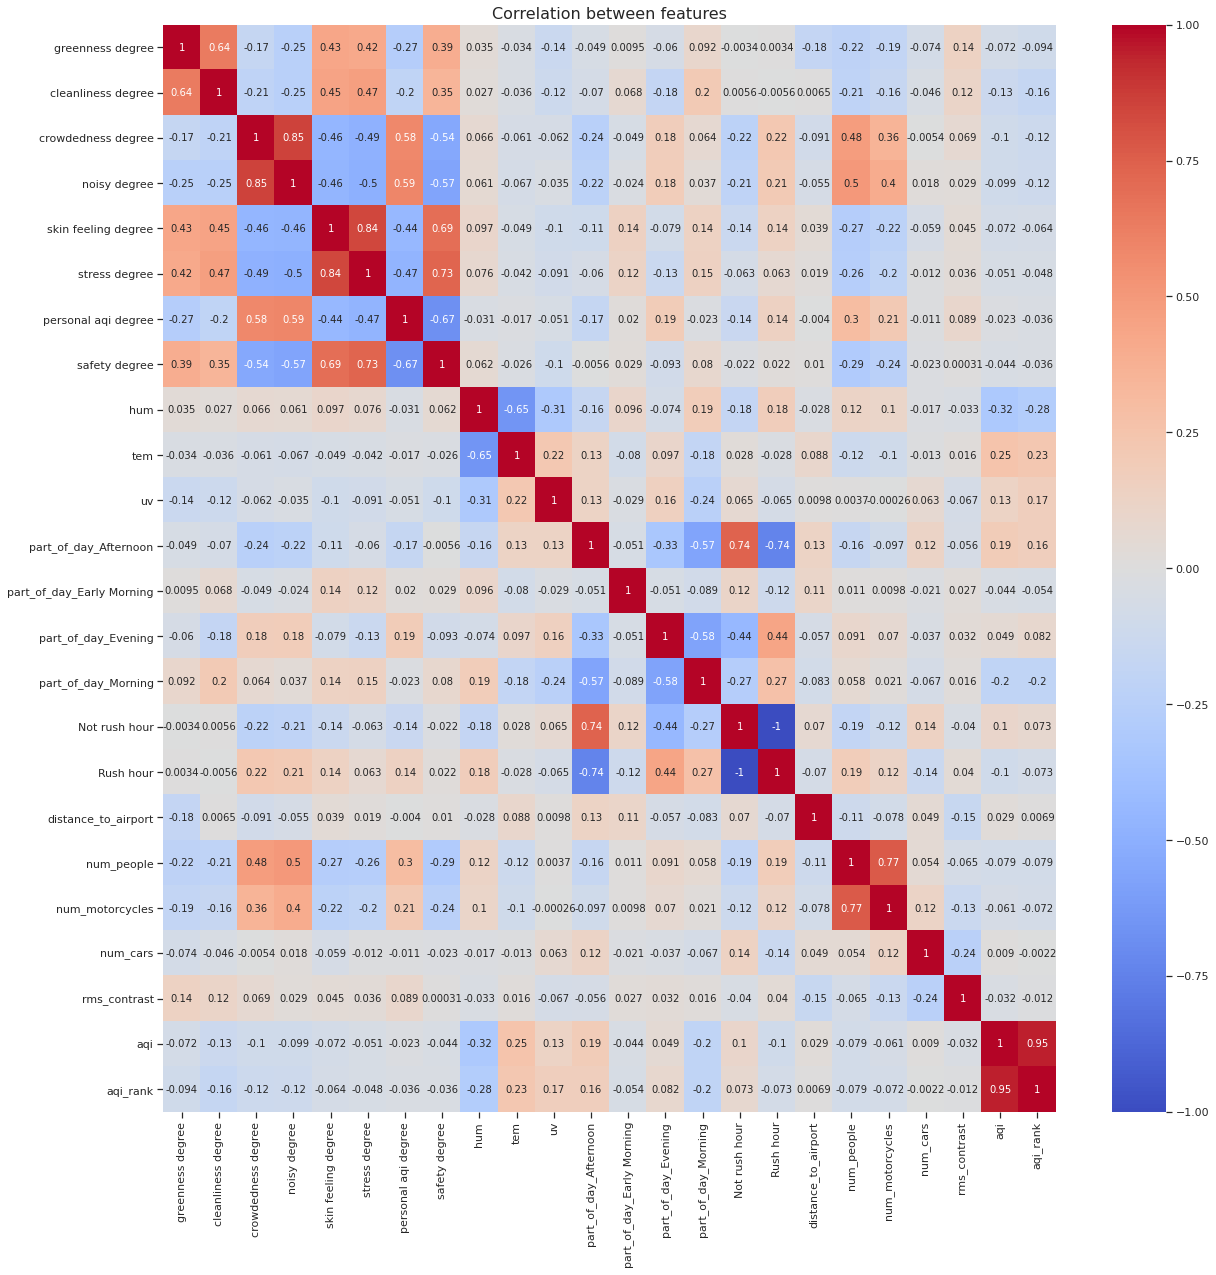

In [54]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between features', fontsize=16)
plt.show()

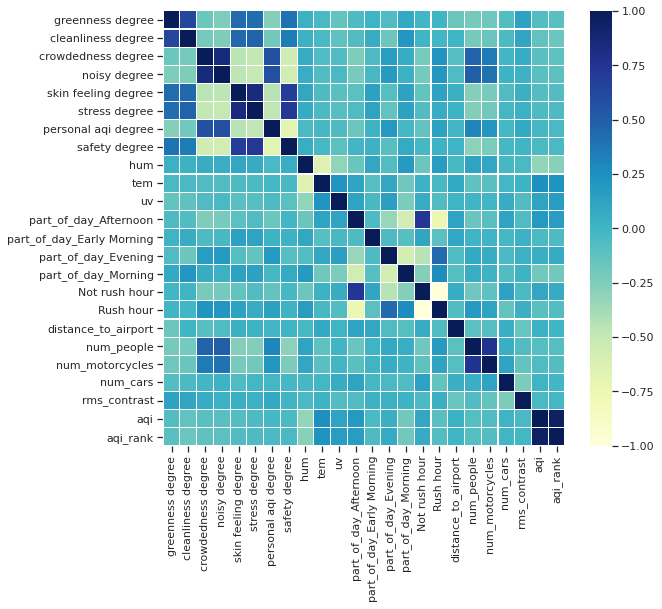

In [55]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [56]:
line_colors = [(31,119,180), (255, 127, 14), (44, 160, 44), (214, 39, 40), (148, 103, 189), 
             (177, 3, 24), (0, 107 , 164), (65, 68, 81)]
             
scatter_colors = [(174,199,232), (255,187,120), (152,223,138), (255,152,150), 
                  (197,176,213), (196,156,148), (247,182,210), (199,199,199), 
                  (158,218,229)]
  
# Rescale to values between 0 and 1 
for i in range(len(line_colors)):  
    r, g, b = line_colors[i]  
    line_colors[i] = (r / 255., g / 255., b / 255.)
for i in range(len(scatter_colors)):  
    r, g, b = scatter_colors[i]  
    scatter_colors[i] = (r / 255., g / 255., b / 255.)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

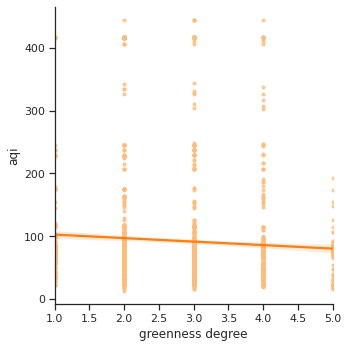

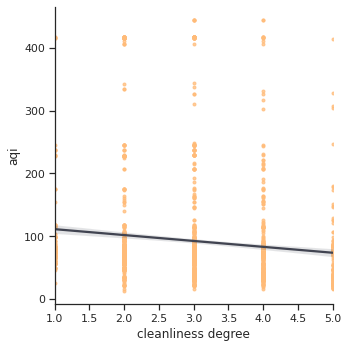

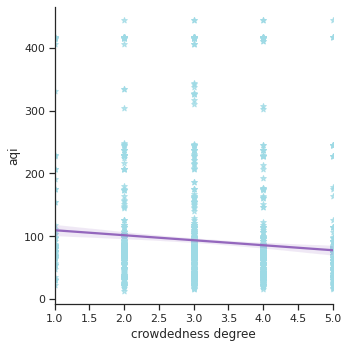

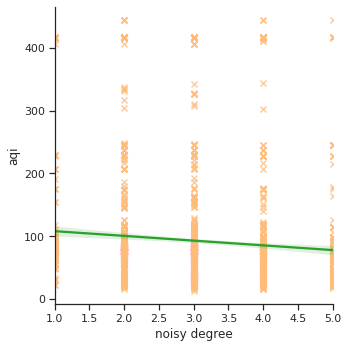

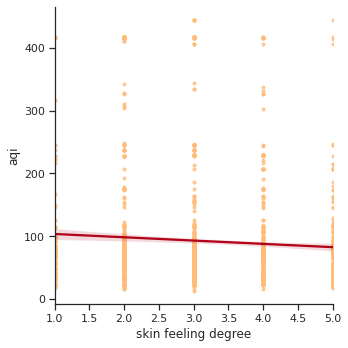

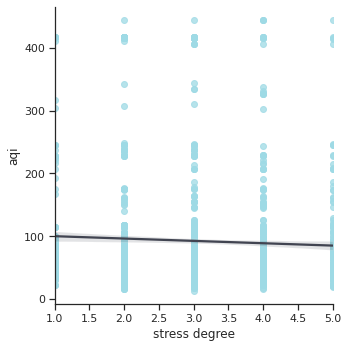

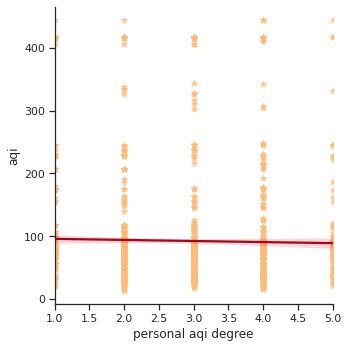

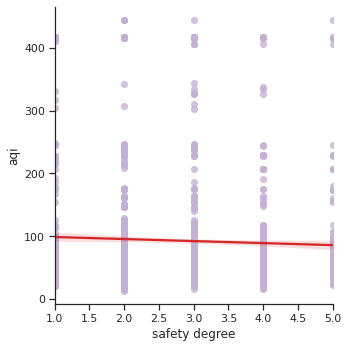

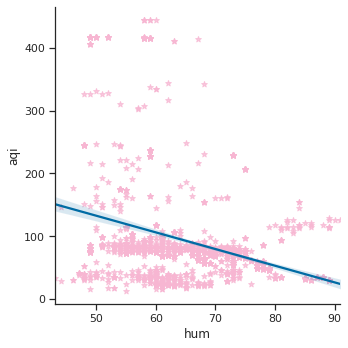

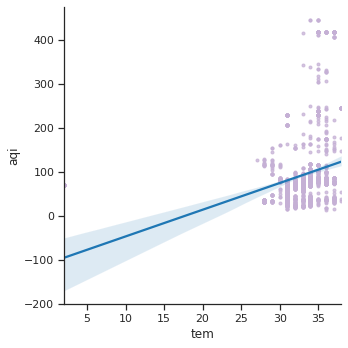

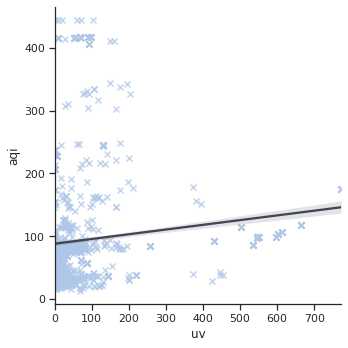

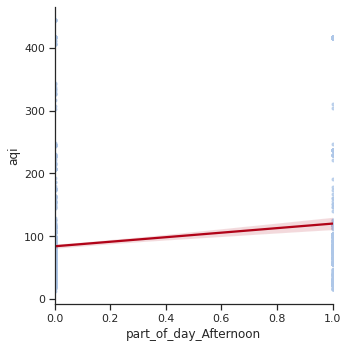

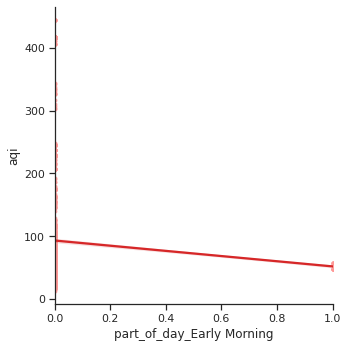

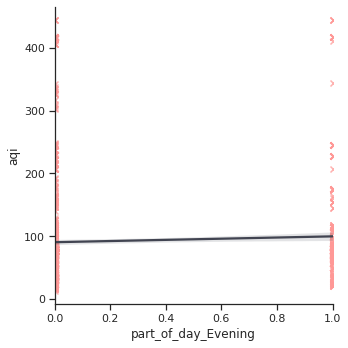

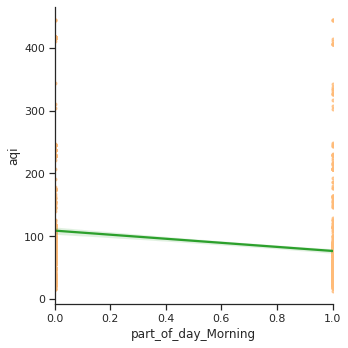

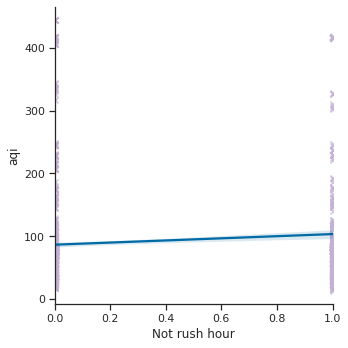

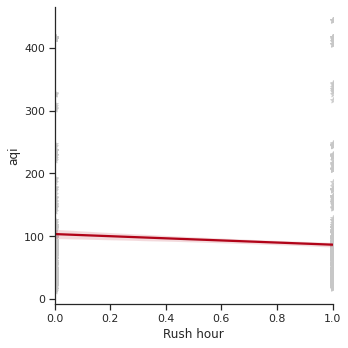

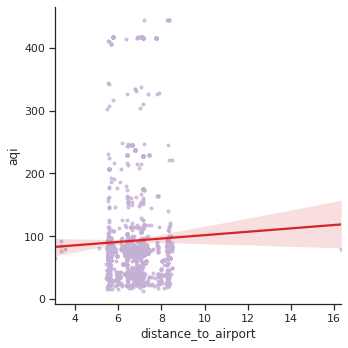

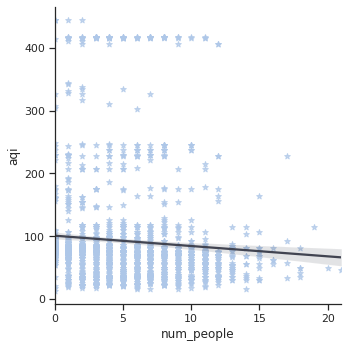

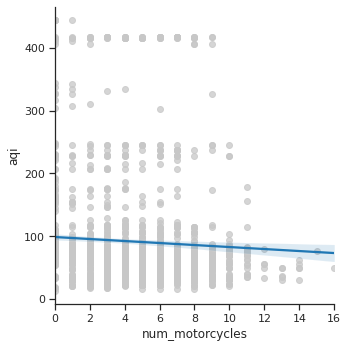

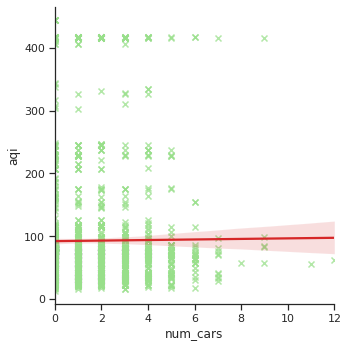

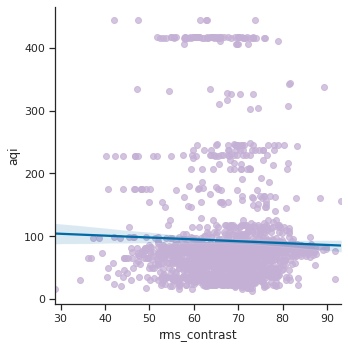

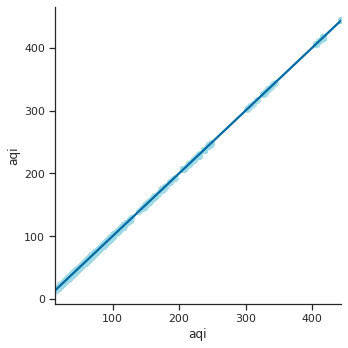

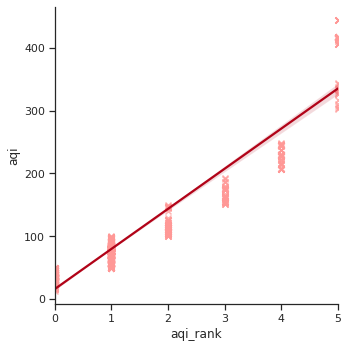

In [57]:
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_air_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi', data = MNR_air_merged_data_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume

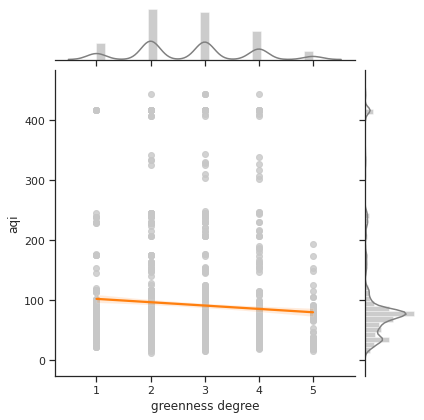

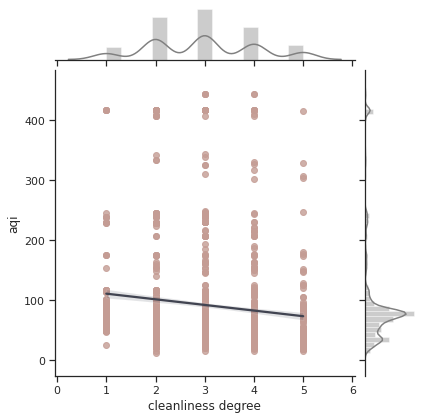

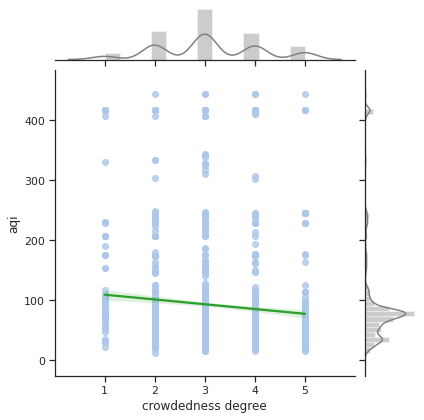

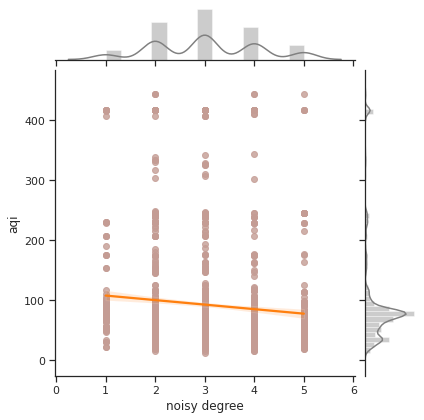

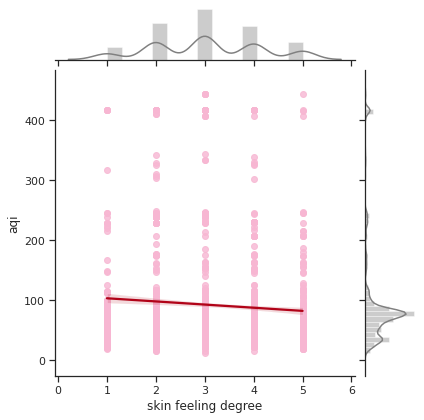

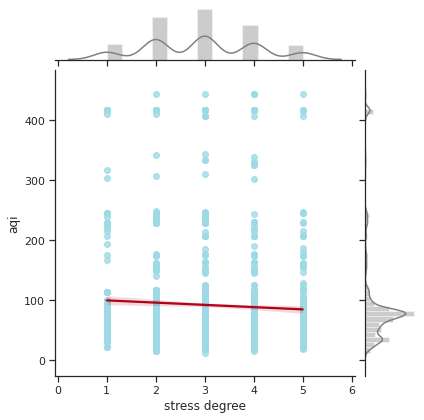

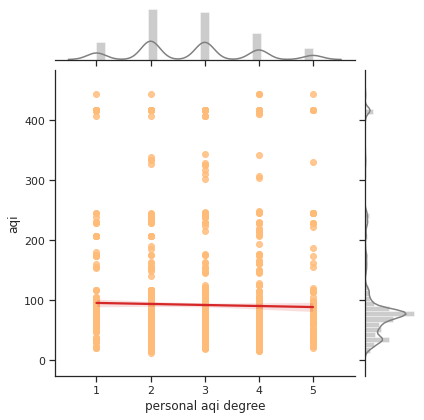

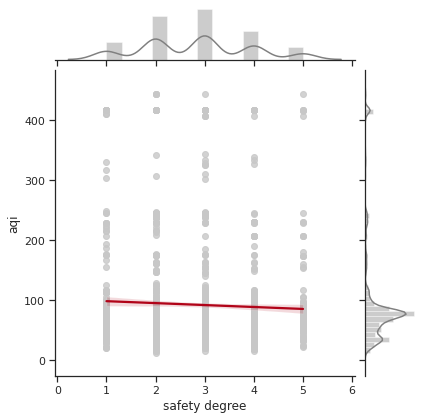

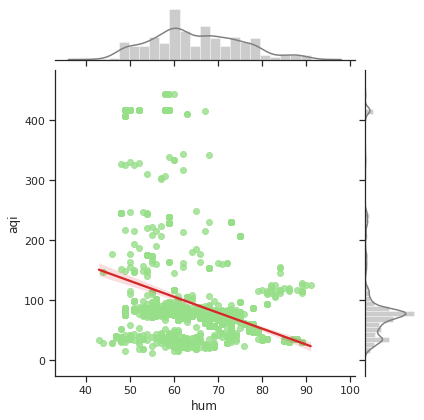

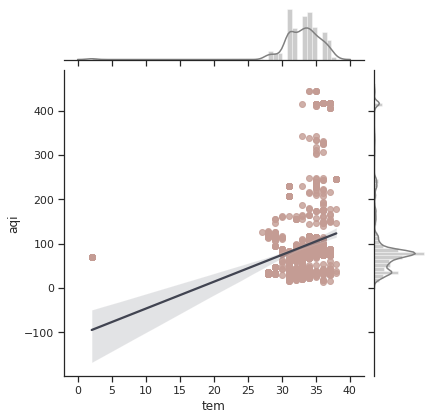

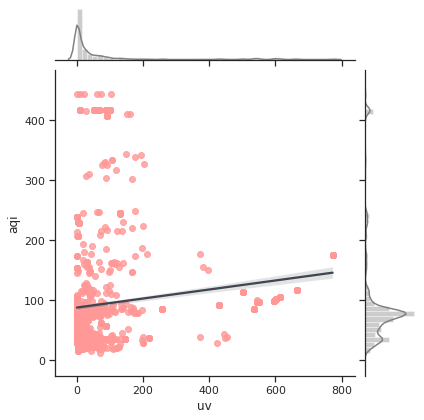

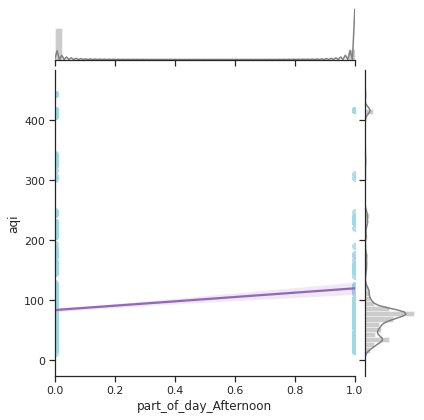

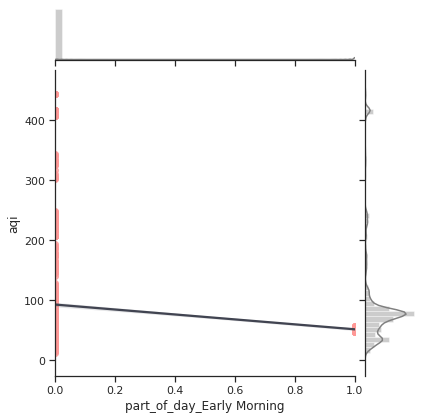

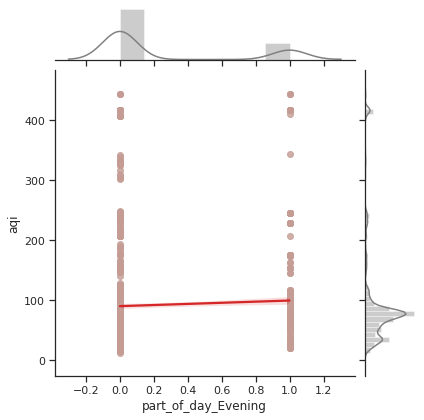

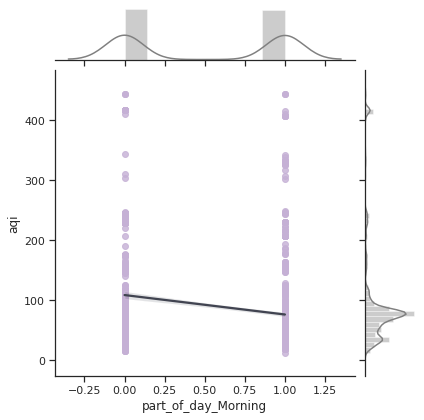

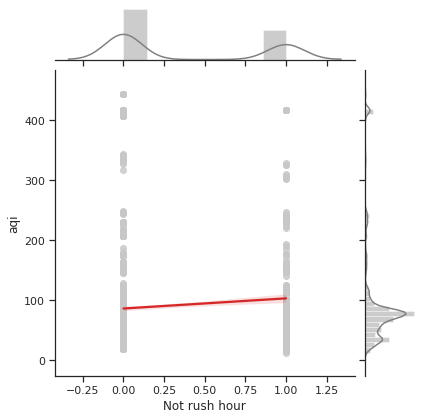

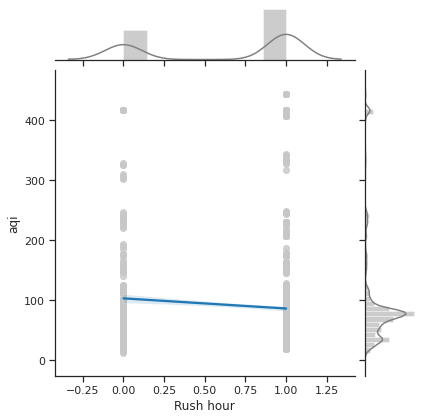

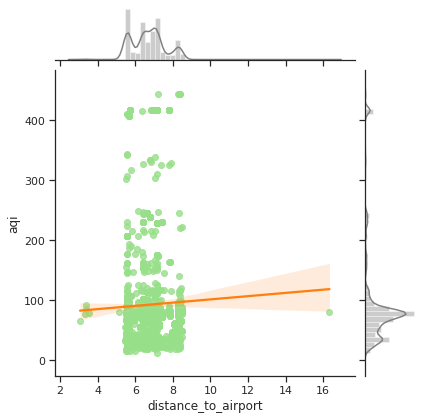

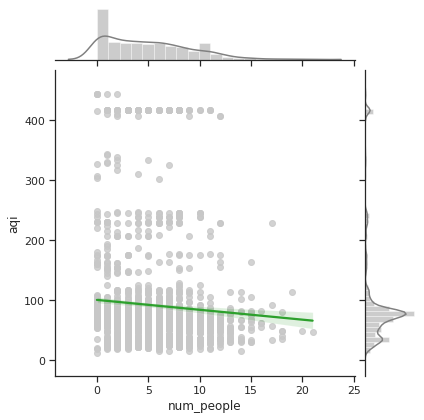

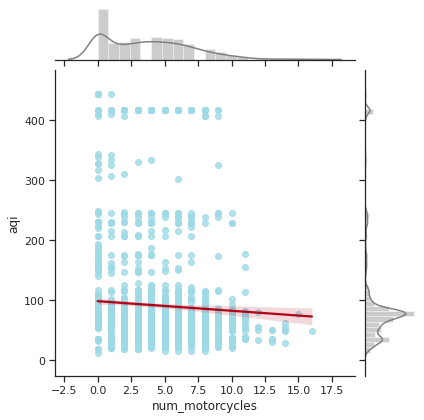

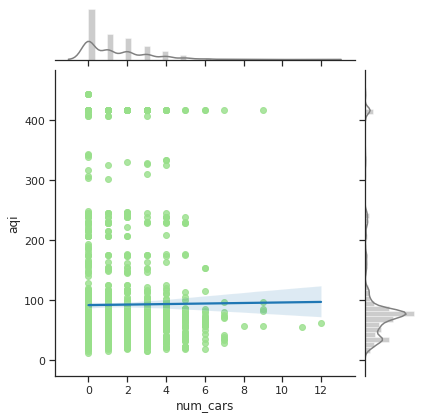

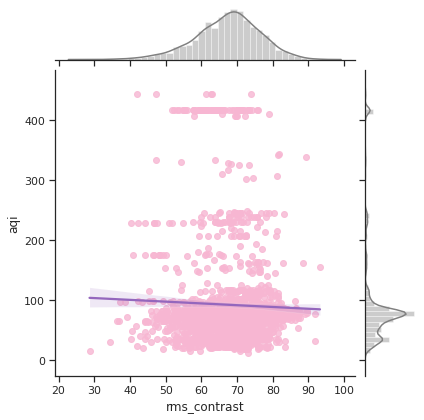

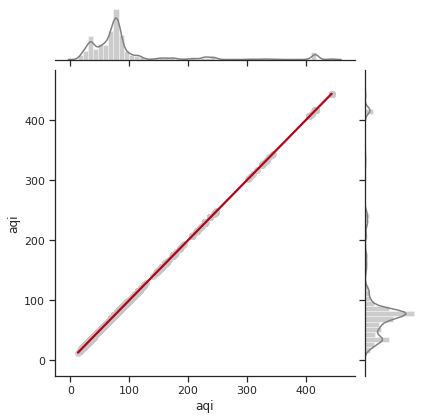

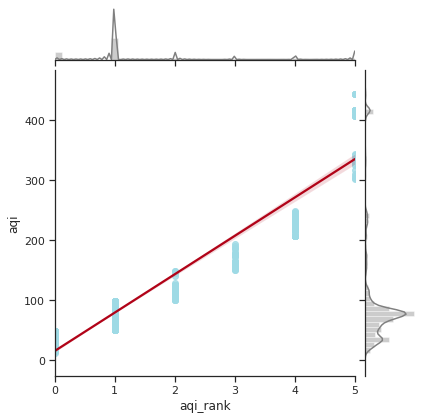

In [58]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_air_merged_data_processed_combine_drop, kind ='reg', color = 'gray',
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


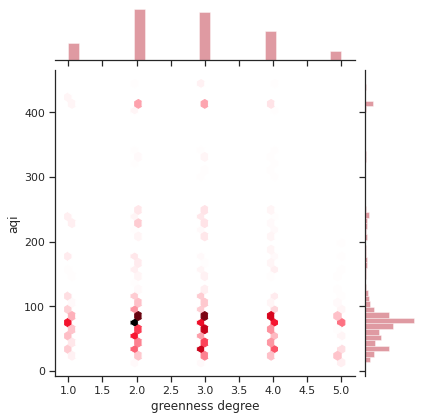

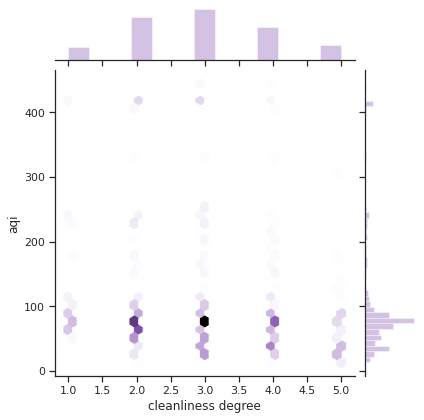

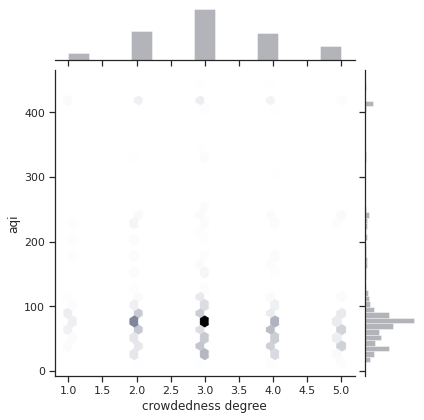

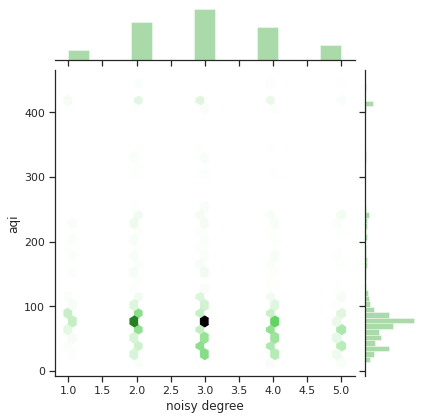

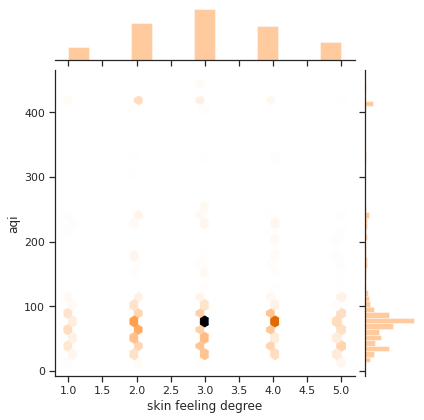

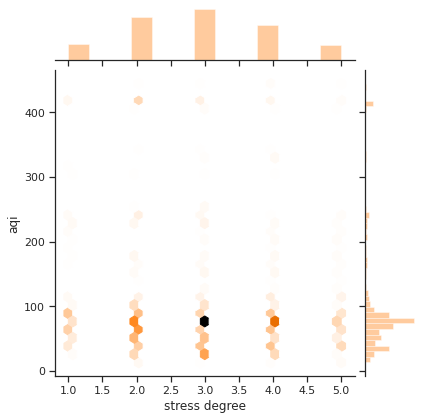

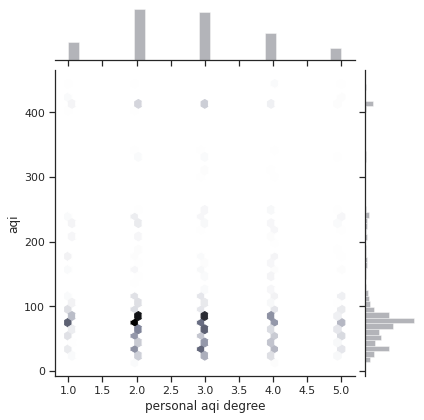

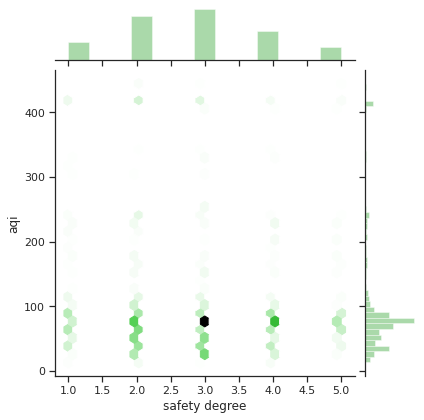

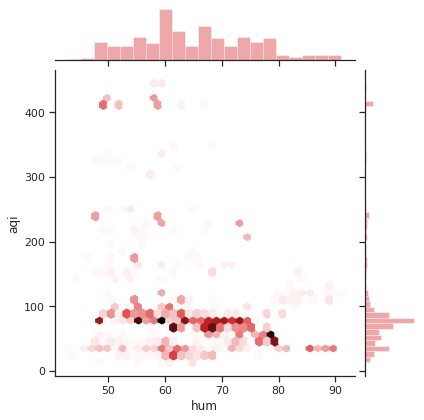

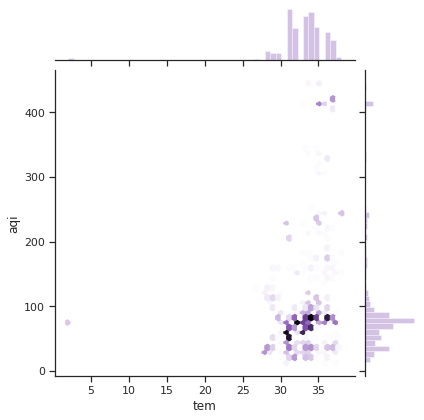

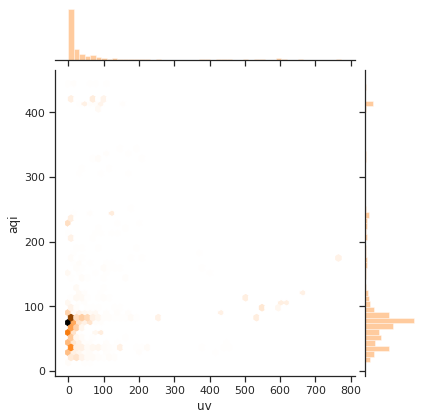

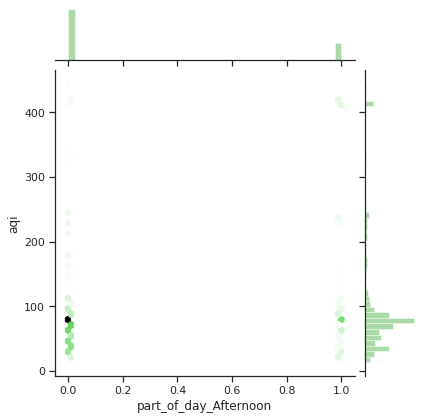

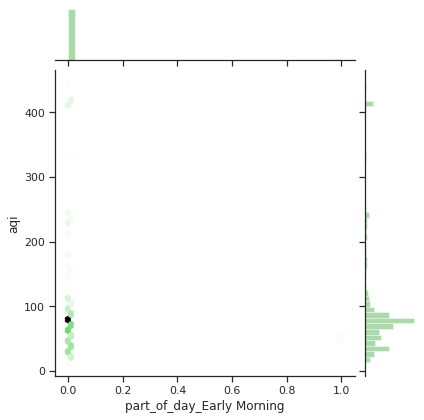

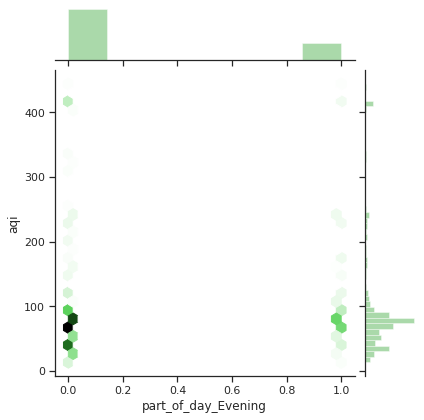

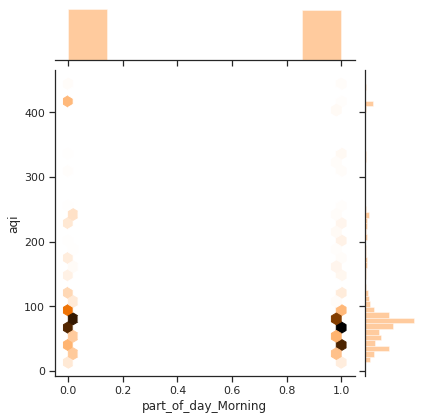

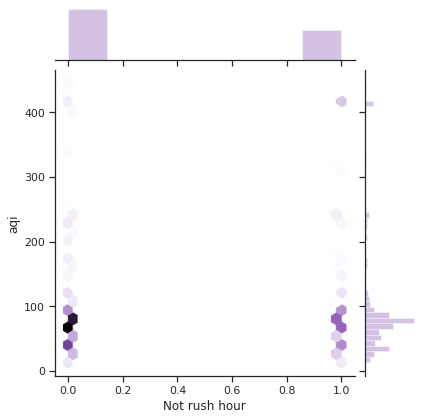

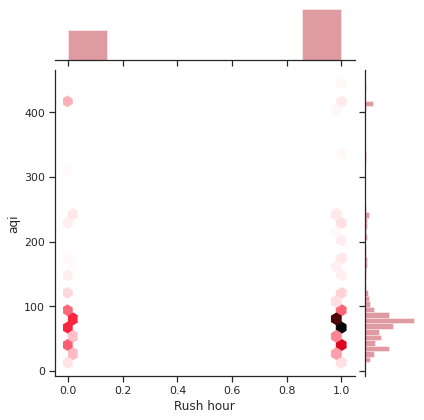

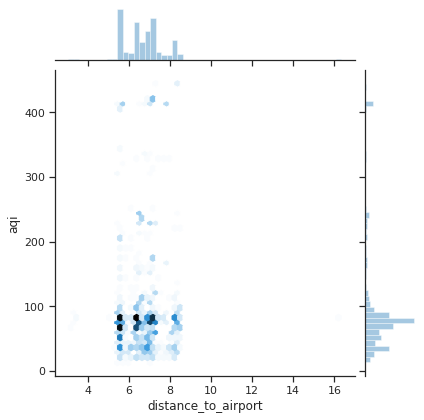

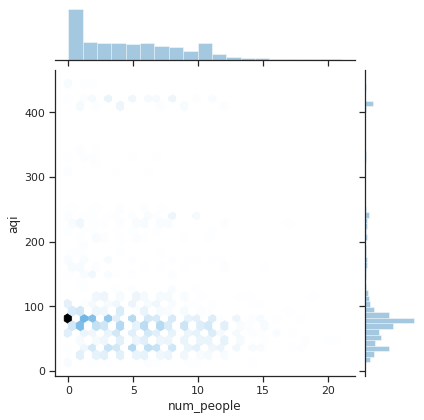

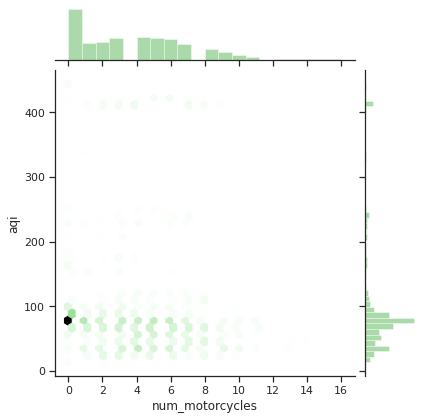

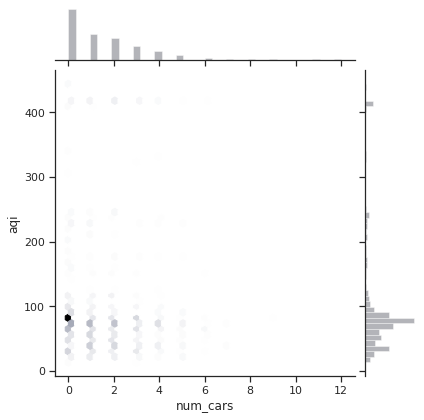

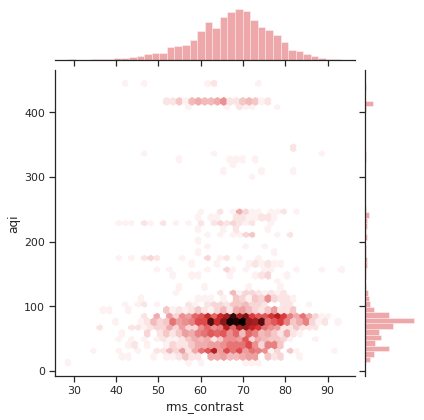

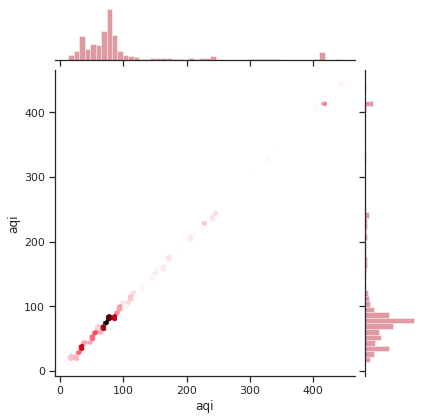

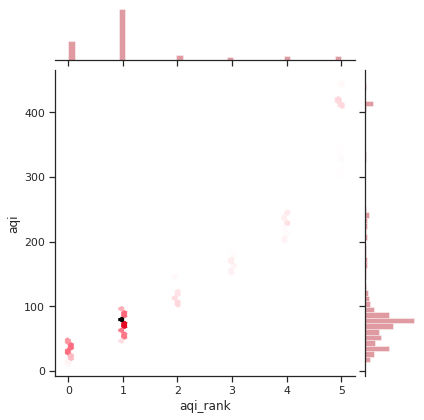

In [59]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_air_merged_data_processed_combine_drop, kind ='hex', color = line_colors[b])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

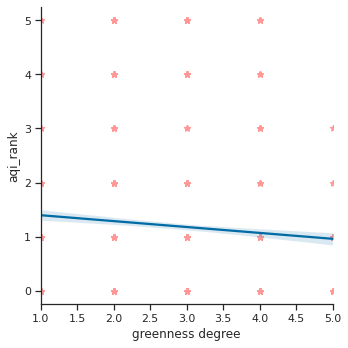

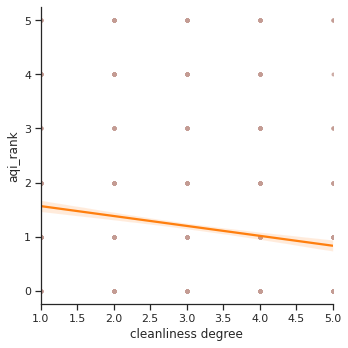

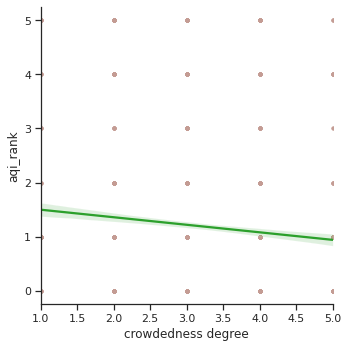

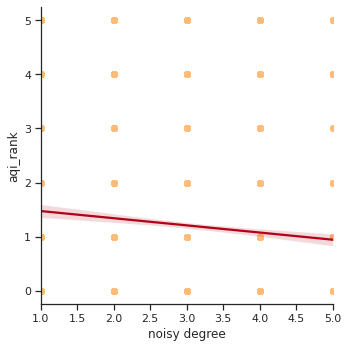

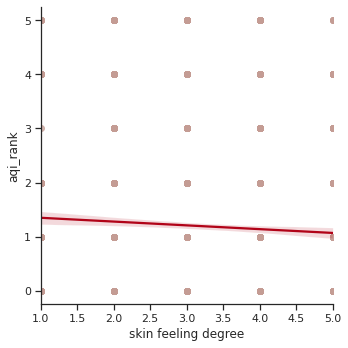

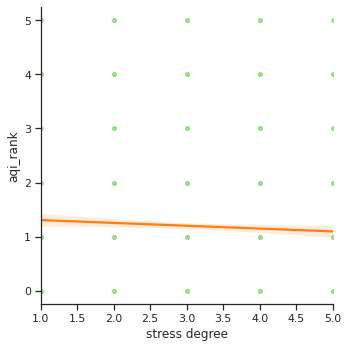

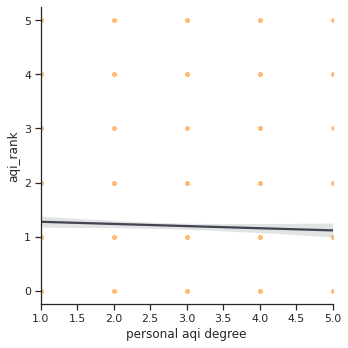

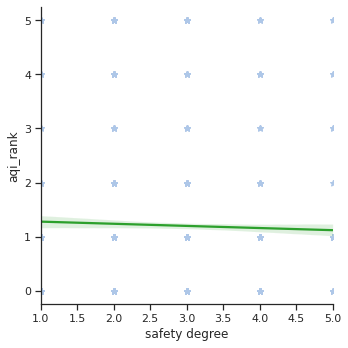

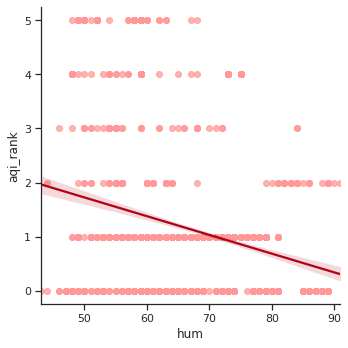

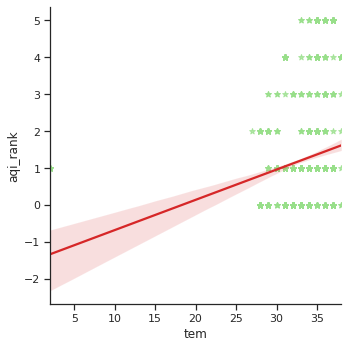

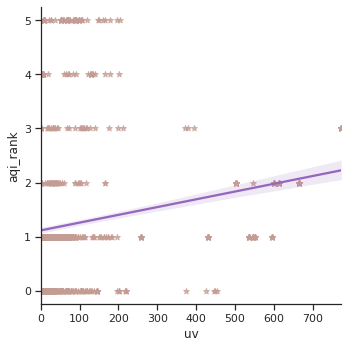

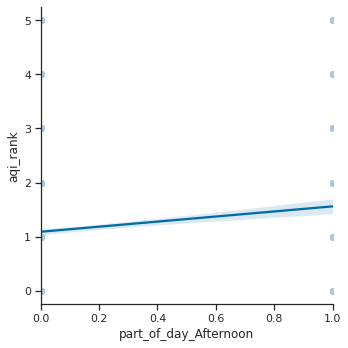

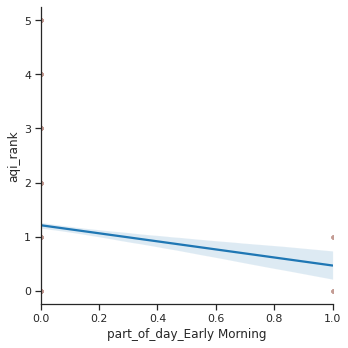

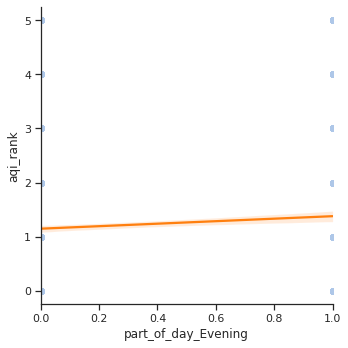

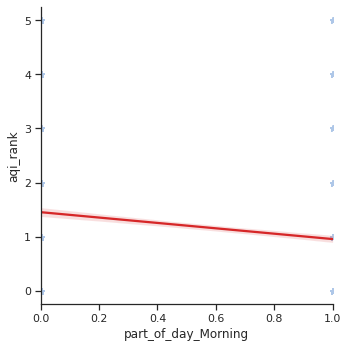

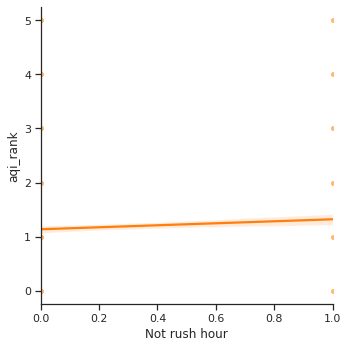

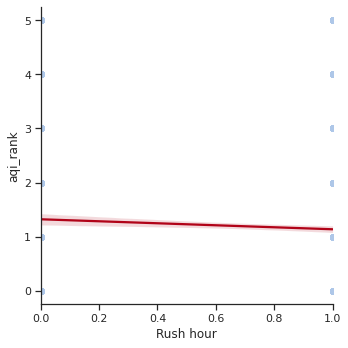

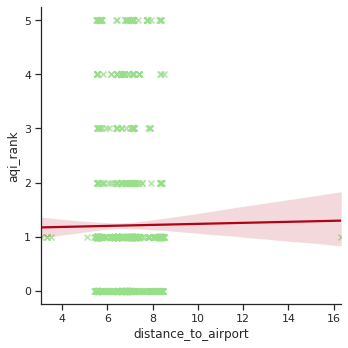

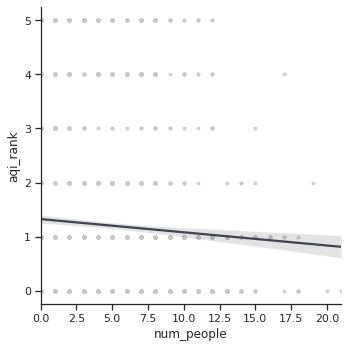

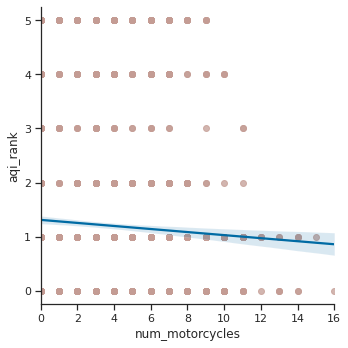

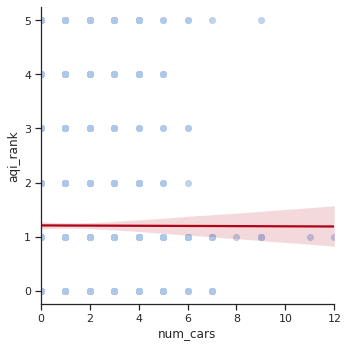

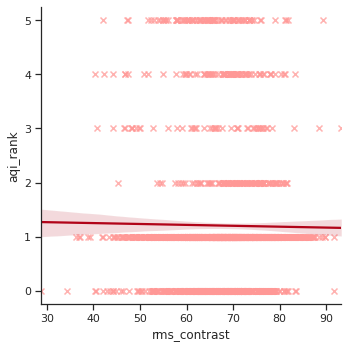

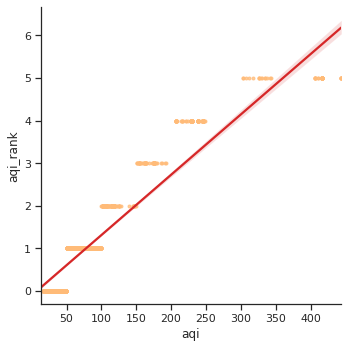

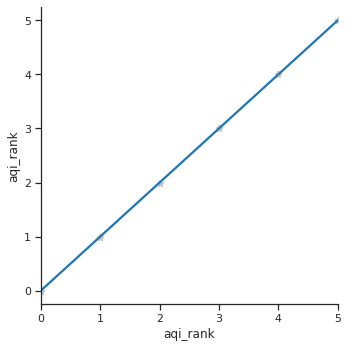

In [60]:
# Visualize linear relationships between each feature and AQI ranks
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_air_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi_rank', data = MNR_air_merged_data_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume

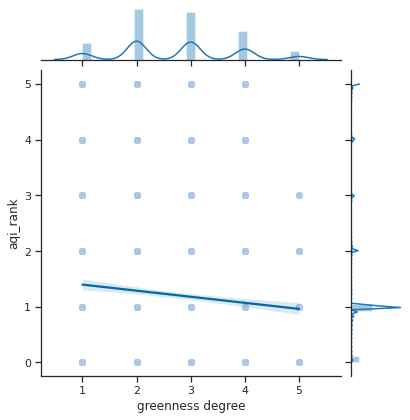

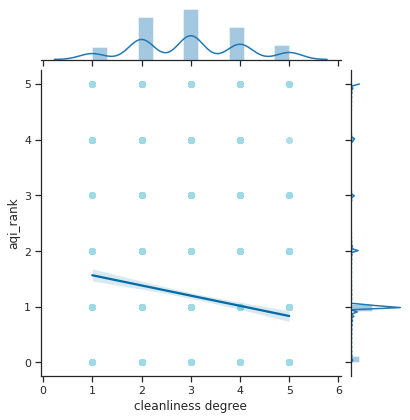

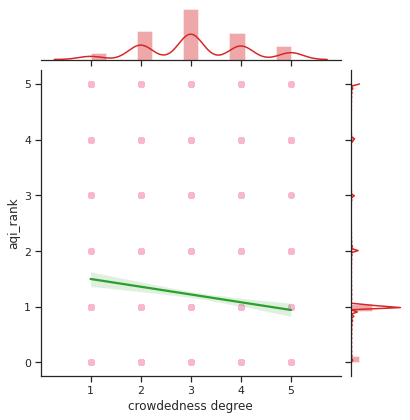

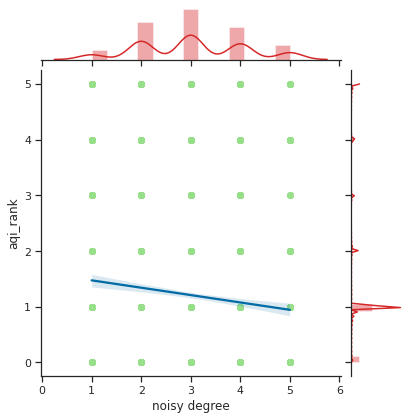

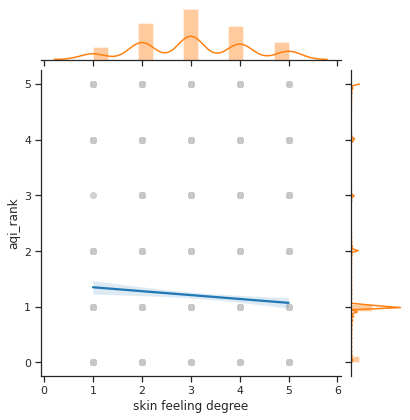

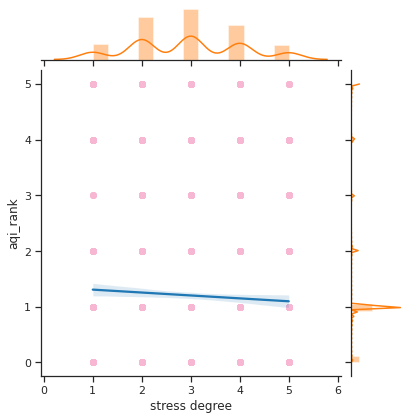

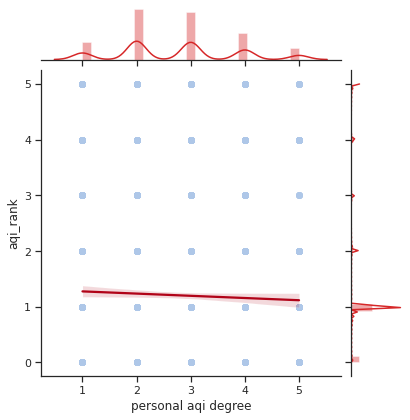

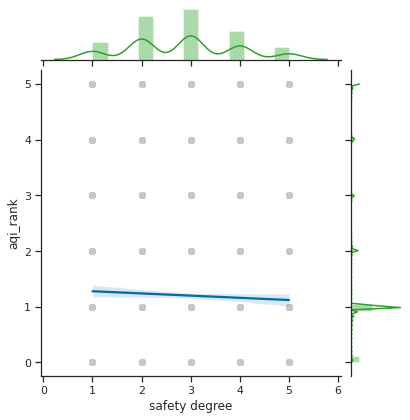

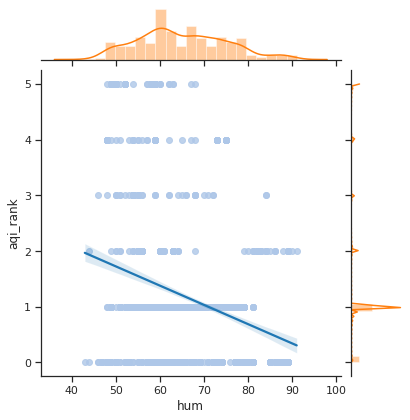

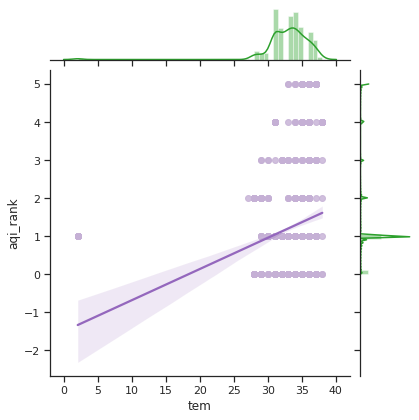

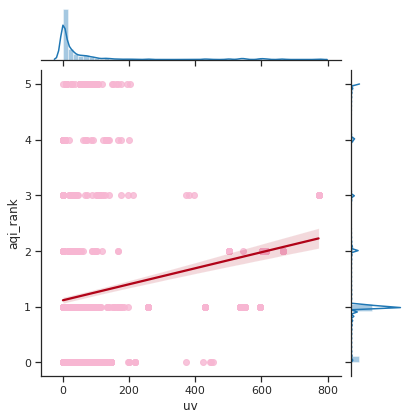

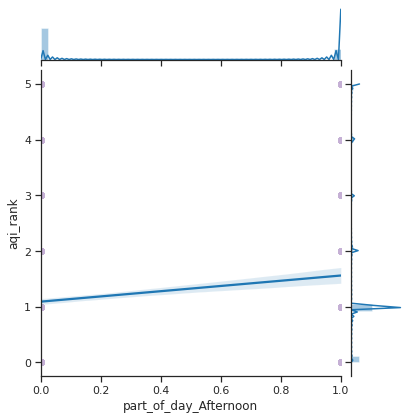

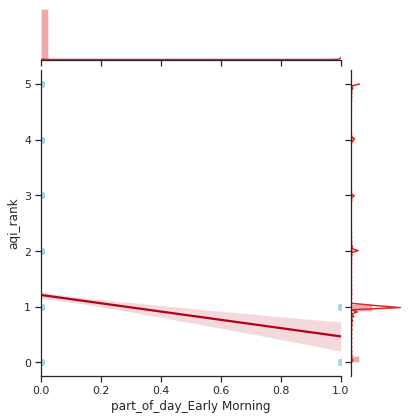

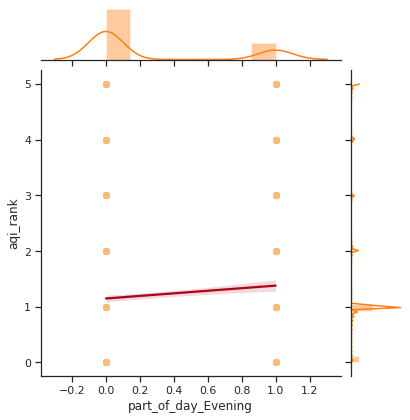

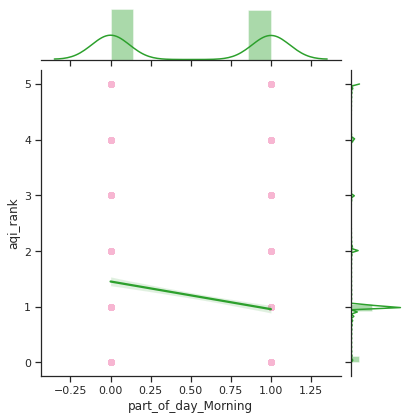

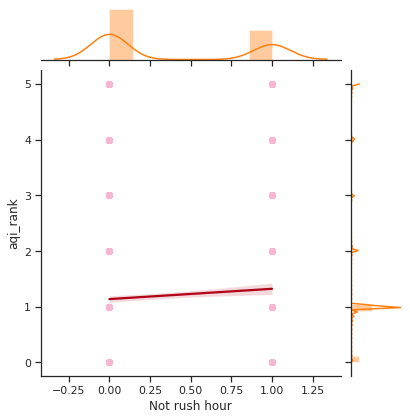

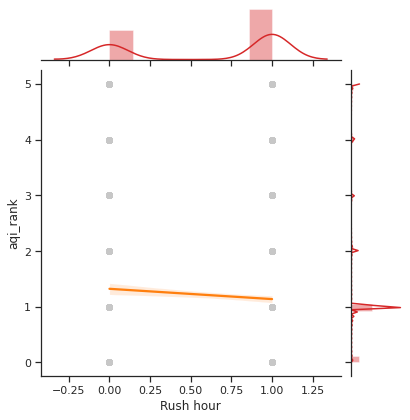

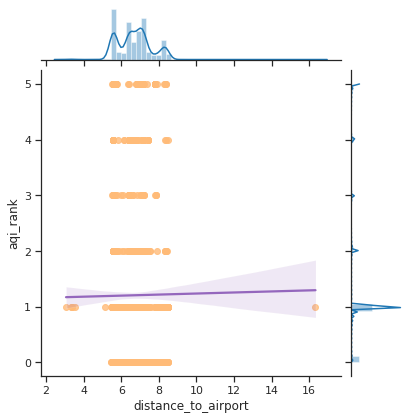

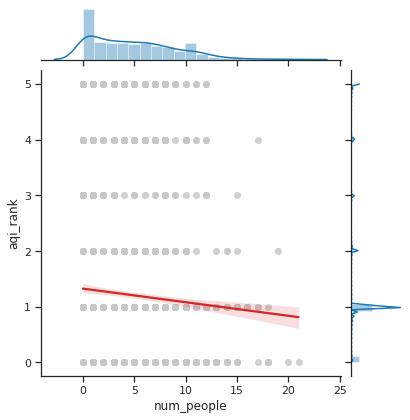

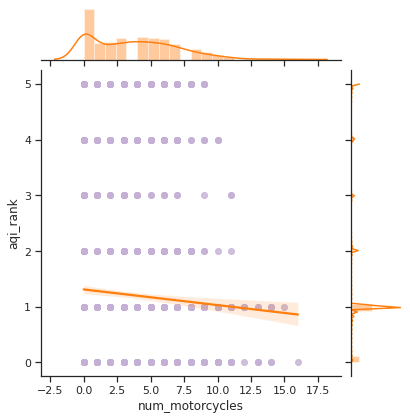

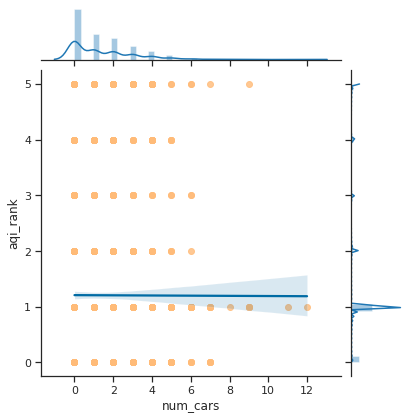

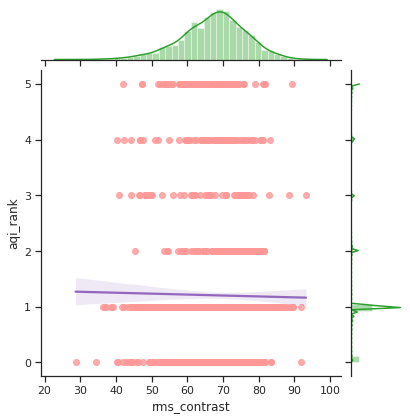

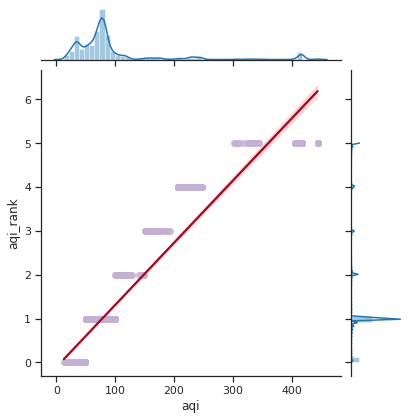

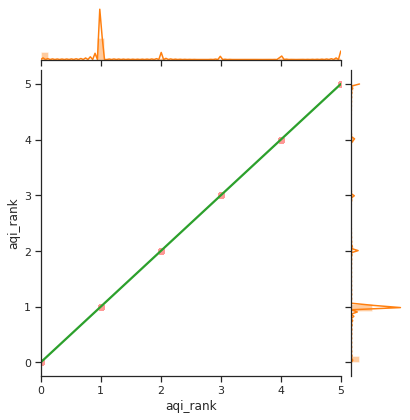

In [61]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_air_merged_data_processed_combine_drop, kind ='reg', color = line_colors[c],
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


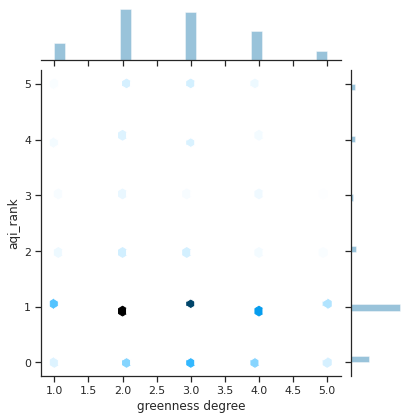

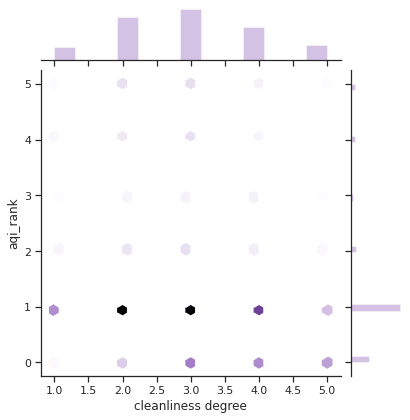

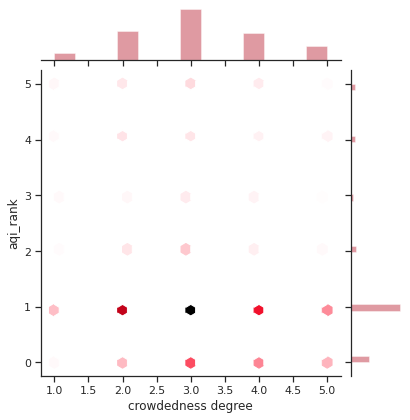

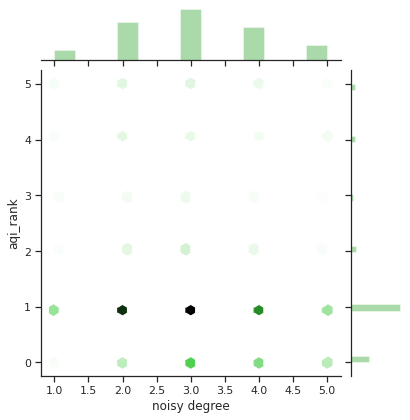

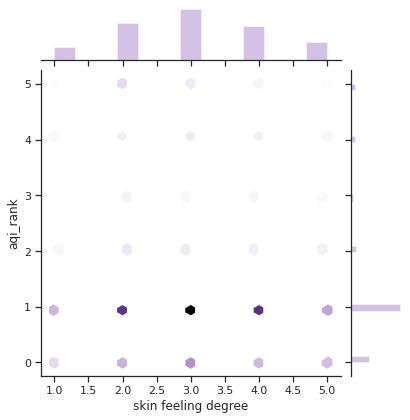

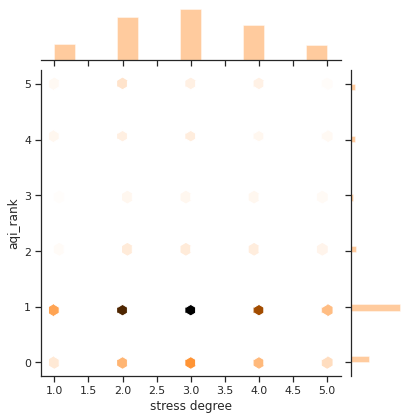

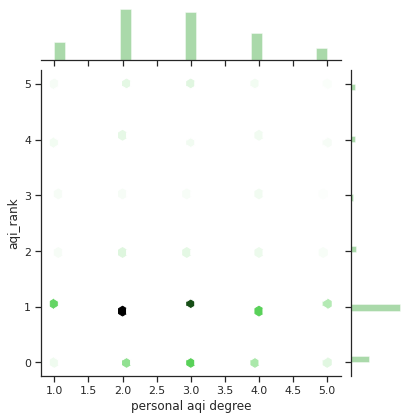

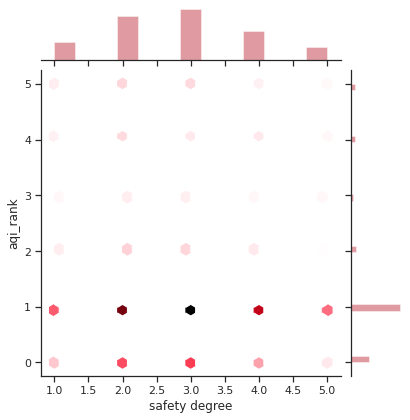

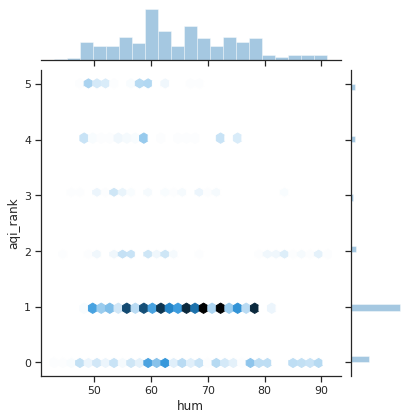

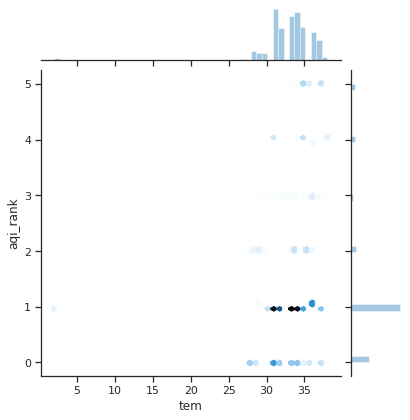

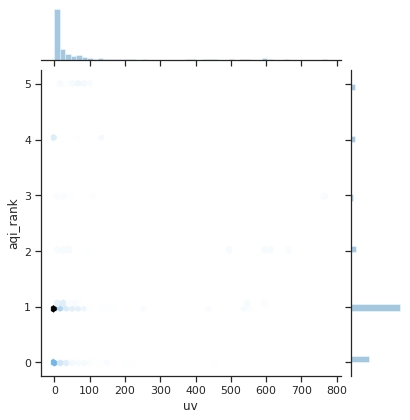

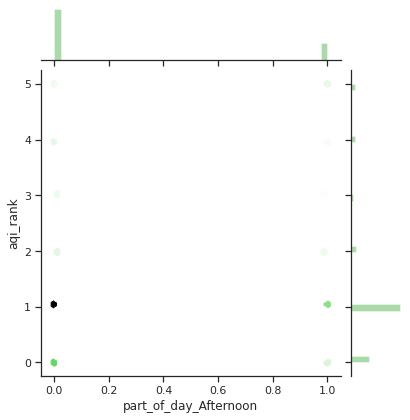

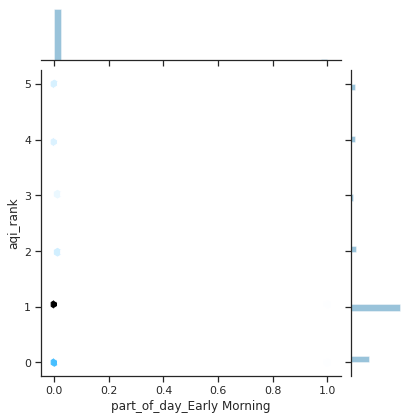

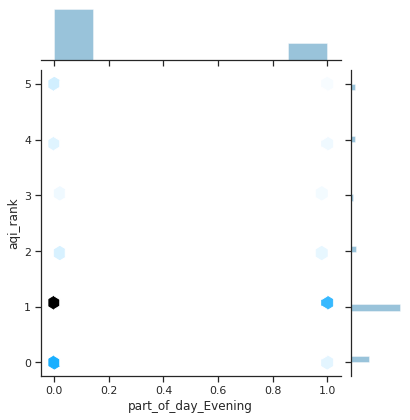

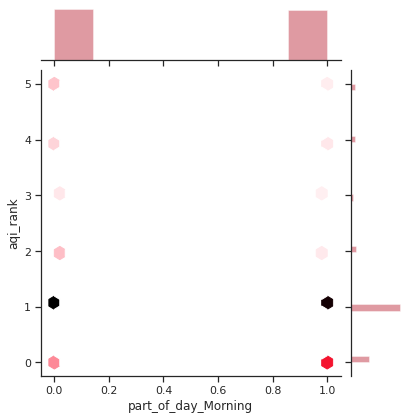

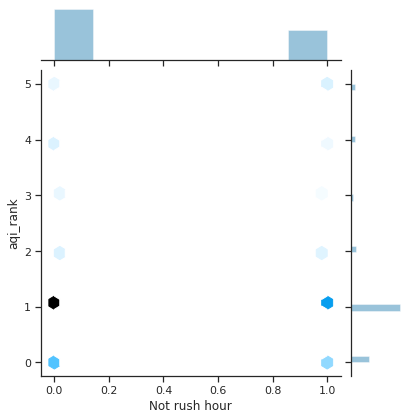

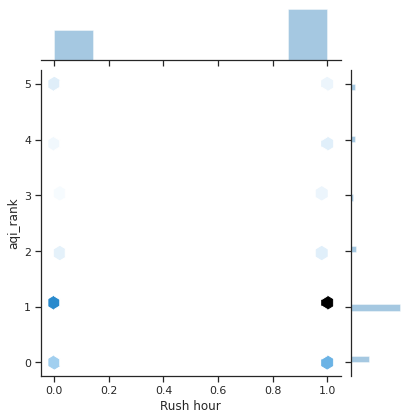

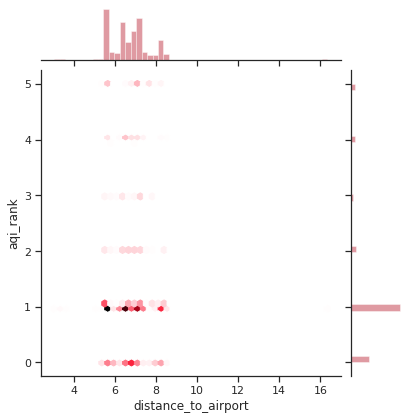

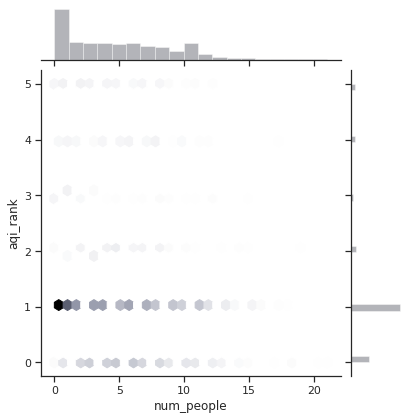

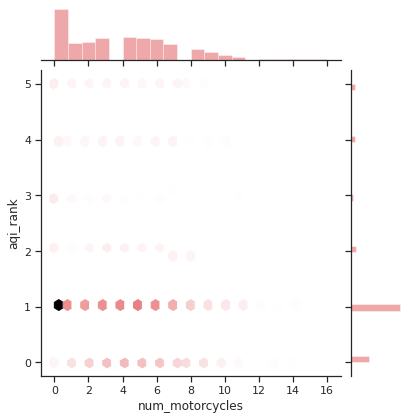

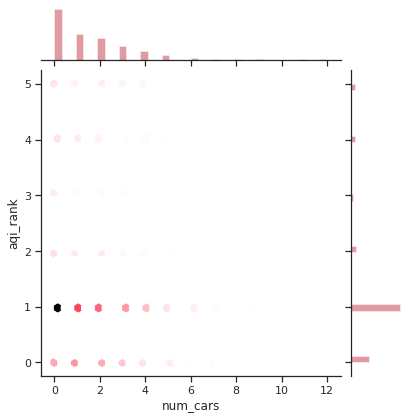

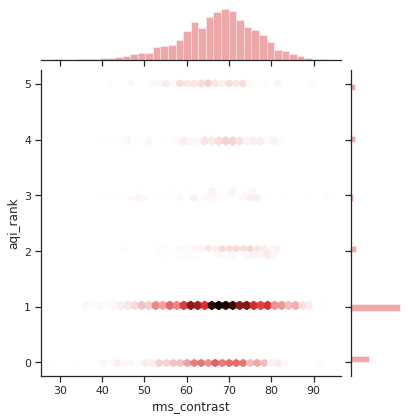

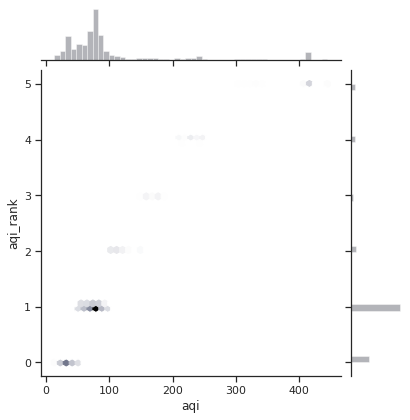

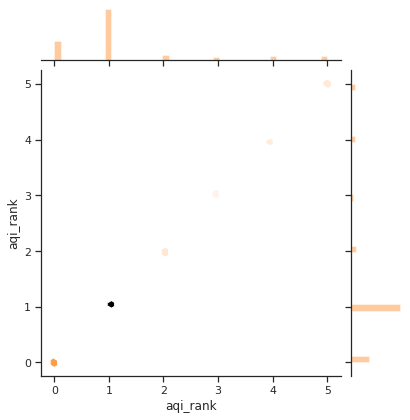

In [62]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_air_merged_data_processed_combine_drop, kind ='hex', color = line_colors[b])